#### About
Income classification using random forest classifier.

Dataset - https://www.kaggle.com/datasets/lodetomasi1995/income-classification

In [78]:
#importing modules
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
df = pd.read_csv('/home/suraj/ClickUp/Jan-Feb/data/income_evaluation.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [63]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [64]:
#removing redundant spaces from column names
df.columns = list(map(lambda a: a.lstrip(), df.columns))


In [65]:
df['income']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

In [66]:
#replacing income with labels # note the space
df['income'].replace([' <=50K',' >50K'],[1,0], inplace=True)


In [67]:
#checking correlation of independent variables with dependent variables
stats = df.select_dtypes(['float','int64'])

<AxesSubplot:>

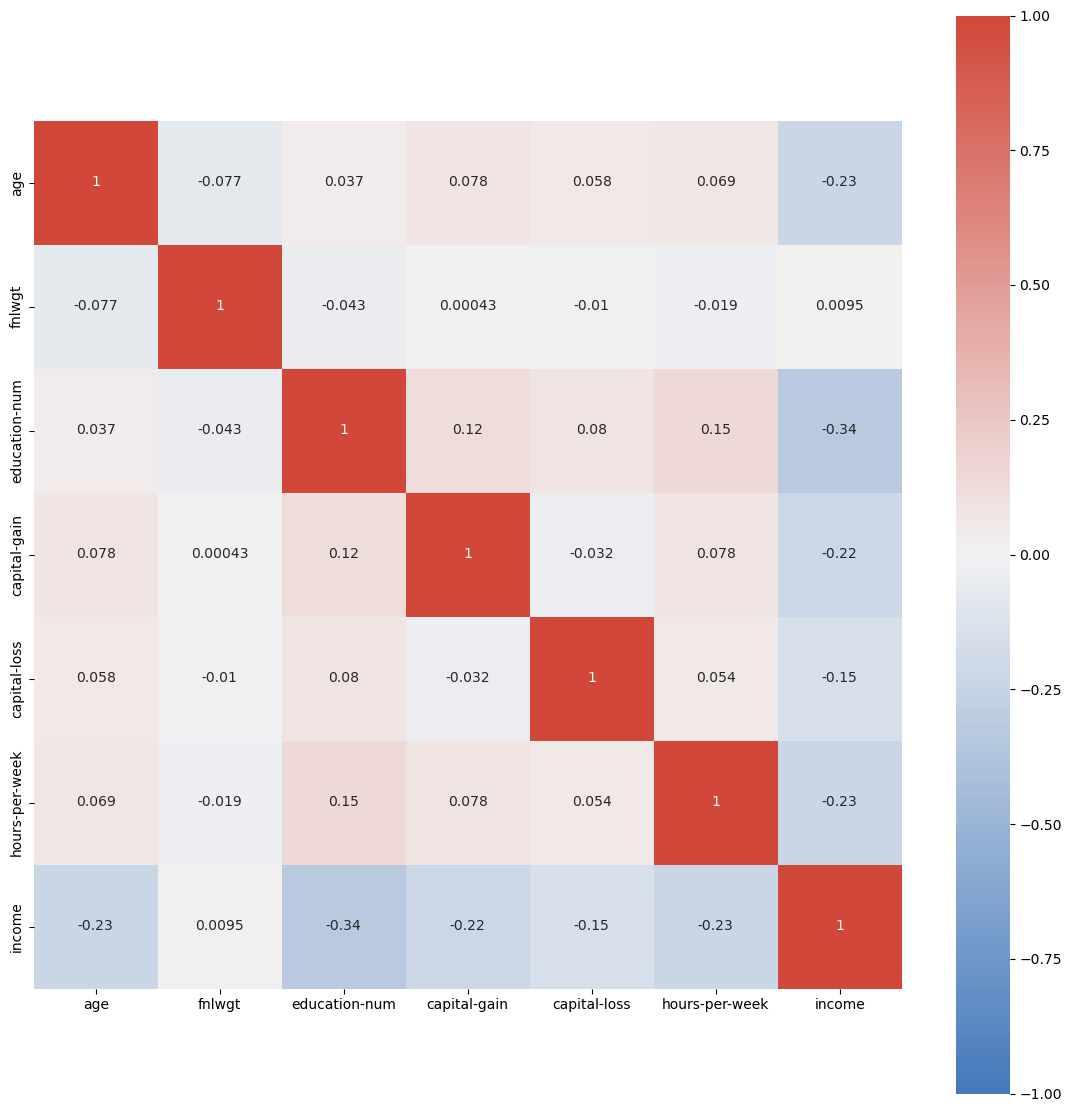

In [68]:
fig = plt.figure(figsize=(14,14))
corr = stats.corr()
sns.heatmap(corr,
            vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(h_neg=250, h_pos=15, as_cmap=True),
            square=True, annot=True)


In [69]:
#standardisation of columns to create dummy variables
data = pd.get_dummies(df)
data.head()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
features = data.drop(columns=['income'])
label = data['income']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2,random_state=52)


In [72]:
X_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
21716,26,238367,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28602,40,478205,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2566,53,181317,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28268,21,209955,9,0,0,48,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2464,69,183958,9,0,0,8,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,20,138768,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24077,23,210474,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11019,30,132565,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9884,50,176751,14,0,0,80,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [73]:
#creating min max scaler and applying standardisation
min_max_scaler = MinMaxScaler()
numeric_values_x_train = min_max_scaler.fit_transform(X_train.select_dtypes(['float64','int64']))
scaled_x_train = pd.concat([pd.DataFrame(numeric_values_x_train, index=X_train.index, columns=X_train.columns[:6]), 
                       X_train.iloc[:, 6:]], axis=1)

numeric_values_x_test = min_max_scaler.transform(X_test.select_dtypes(['float64','int64']))
scaled_x_test = pd.concat([pd.DataFrame(numeric_values_x_test, index=X_test.index, columns=X_test.columns[:6]), 
                       X_test.iloc[:, 6:]], axis=1)

In [74]:
X_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
21716,26,238367,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28602,40,478205,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2566,53,181317,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28268,21,209955,9,0,0,48,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2464,69,183958,9,0,0,8,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,20,138768,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24077,23,210474,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11019,30,132565,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9884,50,176751,14,0,0,80,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [75]:
#applying robust scaler to remove effects of outlier
robust_scaler = RobustScaler()
X_train_s= robust_scaler.fit_transform(X_train)
X_test_s = robust_scaler.transform(X_test)
X_train_s = pd.DataFrame(X_train_s,columns=[X_train.columns])
X_test_s = pd.DataFrame(X_test_s,columns=[X_test.columns])

In [76]:
# random forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [77]:
y_pred = random_forest_classifier.predict(X_test)

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.64      0.68      1584
           1       0.89      0.93      0.91      4929

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513



In [80]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Real Positive:1', 'Real Negative:0'],
                         index=['Predicted Positive:1', 'Predicted Negative:0'])

<AxesSubplot:>

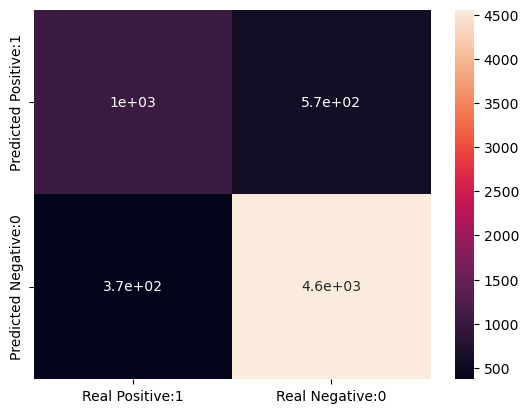

In [83]:
sns.heatmap(cm_matrix, annot=True)
